1. Use NetworkX to generate various graph structures:
    - Balanced tree graphs
    - Scale-free graphs
    - Random graphs with

In [1]:
import networkx as nx

In [2]:
# balanced tree graphs
r = 2 # branching factor
h = 10 # height
bal = nx.balanced_tree(r, h)

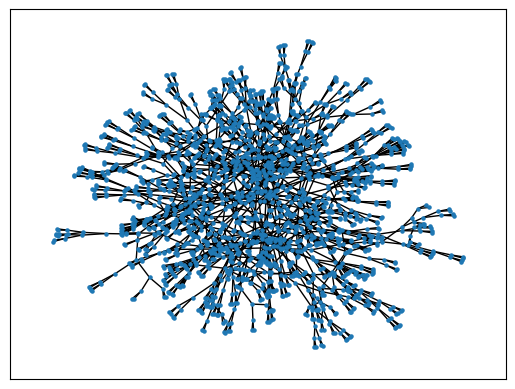

In [3]:
nx.draw_networkx(bal, node_size = 5, with_labels = False)

In [11]:
# scale free graphs
n = 7000 # num_nodes
# alpha + beta + gamma = 1
alpha = 0.2 # prob for adding new node to existing, in-deg dist
beta = 0.5 # prob for adding edge b/t existing
gamma = 0.3 # prob for adding new node to existing, out-deg dist
delta_in = 0.4 # bias for in-deg
delta_out = 0.6 # bias for out-deg
seed = 42
scale = nx.scale_free_graph(n, alpha, beta, gamma,
                            delta_in, delta_out,
                            seed)

In [54]:
nx.draw_networkx(scale, pos = nx.spiral_layout(scale),
                 node_size = 50)

TypeError: 'float' object is not iterable

In [5]:
# random graphs
# erdos renyi, barabasi albert, watts strogatz
n = 100 # num_nodes
p = 0.15 # prob for edge creation
# using old seed of 42
er = nx.erdos_renyi_graph(n, p, seed)
m = 3 # num of edges to attach from new node to existing
ba = nx.barabasi_albert_graph(n, m, seed)
k = 3 # k-NN
ws = nx.watts_strogatz_graph(n, k, p, seed)

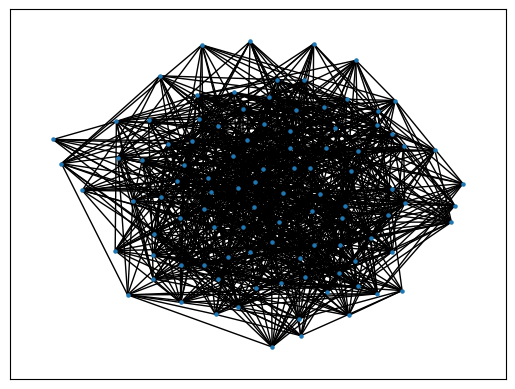

In [44]:
nx.draw_networkx(er,
                 node_size = 5,
                 linewidths = 1,
                 with_labels=False,
                 pos = nx.spring_layout(er))

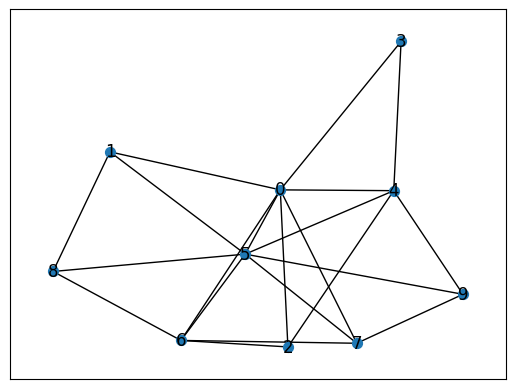

In [20]:
nx.draw_networkx(ba,
                 node_size = 50)

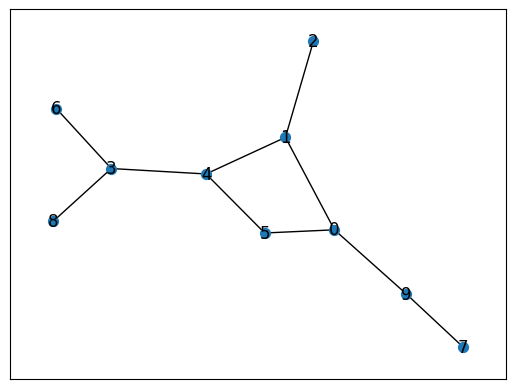

In [21]:
nx.draw_networkx(ws,
                 node_size = 50)

Compute hyperbolicity for the generated graphs using this code: https://github.com/HazyResearch/hgcn/blob/master/utils/hyperbolicity.py

In [7]:
# code copied from page:
#####################################
import os
import pickle as pkl
import sys
import time

import networkx as nx
import numpy as np
from tqdm import tqdm

# perhaps change num of samples
def hyperbolicity_sample(G, num_samples=50000):
    curr_time = time.time()
    hyps = []
    for i in tqdm(range(num_samples)):
        curr_time = time.time()
        node_tuple = np.random.choice(G.nodes(), 4, replace=False)
        s = []
        try:
            d01 = nx.shortest_path_length(G, source=node_tuple[0], target=node_tuple[1], weight=None)
            d23 = nx.shortest_path_length(G, source=node_tuple[2], target=node_tuple[3], weight=None)
            d02 = nx.shortest_path_length(G, source=node_tuple[0], target=node_tuple[2], weight=None)
            d13 = nx.shortest_path_length(G, source=node_tuple[1], target=node_tuple[3], weight=None)
            d03 = nx.shortest_path_length(G, source=node_tuple[0], target=node_tuple[3], weight=None)
            d12 = nx.shortest_path_length(G, source=node_tuple[1], target=node_tuple[2], weight=None)
            s.append(d01 + d23)
            s.append(d02 + d13)
            s.append(d03 + d12)
            s.sort()
            hyps.append((s[-1] - s[-2]) / 2)
        except Exception as e:
            continue
    print('Time for hyp: ', time.time() - curr_time)
    return max(hyps)

In [8]:
bal_hyps = hyperbolicity_sample(bal, num_samples = 100)
bal_hyps # 0 expected for tree

100%|██████████| 100/100 [00:00<00:00, 2368.66it/s]

Time for hyp:  0.0011157989501953125


0.0

In [12]:
scale_hyps = hyperbolicity_sample(scale, num_samples = 500)
scale_hyps

100%|██████████| 500/500 [00:00<00:00, 2902.84it/s]

Time for hyp:  0.0007731914520263672


2.5

In [10]:
er_hyps = hyperbolicity_sample(er, num_samples = 500)
er_hyps

100%|██████████| 500/500 [00:00<00:00, 16308.95it/s]

Time for hyp:  0.0006198883056640625


1.0

In [13]:
import networkit as nk
from networkit import nxadapter
from GraphRicciCurvature.FormanRicci import FormanRicci
from GraphRicciCurvature.OllivierRicci import OllivierRicci

In [22]:
print("\n- Graph: balanced tree")
G = bal

print("\n===== Compute the Ollivier-Ricci curvature of the given graph G =====")
# compute the Ollivier-Ricci curvature of the given graph G
orc = OllivierRicci(G, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
print("Balanced tree: The Ollivier-Ricci curvature of edge (0,1) is %f" % orc.G[0][1]["ricciCurvature"])

print("\n===== Compute the Forman-Ricci curvature of the given graph G =====")
frc = FormanRicci(G)
frc.compute_ricci_curvature()
print("Balanced tree: The Forman-Ricci curvature of edge (0,1) is %f" % frc.G[0][1]["formanCurvature"])



- Graph: balanced tree

===== Compute the Ollivier-Ricci curvature of the given graph G =====
Balanced tree: The Ollivier-Ricci curvature of edge (0,1) is -0.166667

===== Compute the Forman-Ricci curvature of the given graph G =====
Balanced tree: The Forman-Ricci curvature of edge (0,1) is -1.000000


In [24]:
print("\n- Graph: scale-free")
G = scale
# scale free is a multidigraph

print("\n-Constructing digraph from multi digraph")
Gd = nx.DiGraph(G)

print("\n===== Compute the Ollivier-Ricci curvature of the given directed graph Gd =====")
orc_directed = OllivierRicci(Gd)
orc_directed.compute_ricci_curvature()
for n1, n2 in Gd.edges():
    print("Directed Graph: The Ollivier-Ricci curvature of edge(%d,%d) id %f" %
          (n1, n2, orc_directed.G[n1][n2]["ricciCurvature"]))

# Forman-Ricci not support for direct graph yet.
# or for undirected
'''
print("\n===== Compute the Ollivier-Ricci curvature of the given graph G =====")
# compute the Ollivier-Ricci curvature of the given graph G
orc = OllivierRicci(G, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
print("Scale-free: The Ollivier-Ricci curvature of edge (0,1) is %f" % orc.G[0][1]["ricciCurvature"])
'''


- Graph: scale-free

-Constructing digraph from multi digraph

===== Compute the Ollivier-Ricci curvature of the given directed graph Gd =====


/opt/anaconda3/envs/graphriccicurvature/lib/python3.12/site-packages/ot/lp/__init__.py:634: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  return f(b)
/opt/anaconda3/envs/graphriccicurvature/lib/python3.12/site-packages/ot/lp/__init__.py:634: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  return f(b)
/opt/anaconda3/envs/graphriccicurvature/lib/python3.12/site-packages/ot/lp/__init__.py:634: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histo

Directed Graph: The Ollivier-Ricci curvature of edge(0,1) id -0.575256
Directed Graph: The Ollivier-Ricci curvature of edge(0,3) id -0.471565


KeyError: 0

In [19]:
er

In [23]:
print("\n- Graph: Erdos-Renyi")
G = er

print("\n===== Compute the Ollivier-Ricci curvature of the given graph G =====")
# compute the Ollivier-Ricci curvature of the given graph G
orc = OllivierRicci(G, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
print("Erdos-Renyi: The Ollivier-Ricci curvature of edge (0,1) is %f" % orc.G[0][1]["ricciCurvature"])

print("\n===== Compute the Forman-Ricci curvature of the given graph G =====")
frc = FormanRicci(G)
frc.compute_ricci_curvature()
print("Erdos-Renyi: The Forman-Ricci curvature of edge (0,1) is %f" % frc.G[0][1]["formanCurvature"])



- Graph: Erdos-Renyi

===== Compute the Ollivier-Ricci curvature of the given graph G =====


KeyError: 1